1. Array Value of x
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
2. Array Value of y
[0. 0. 0. 1. 1.]
3. Exam 1 - score graph


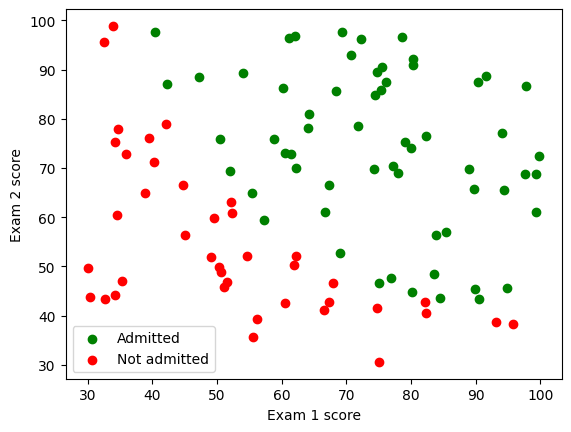

4. Sigmoid function graph


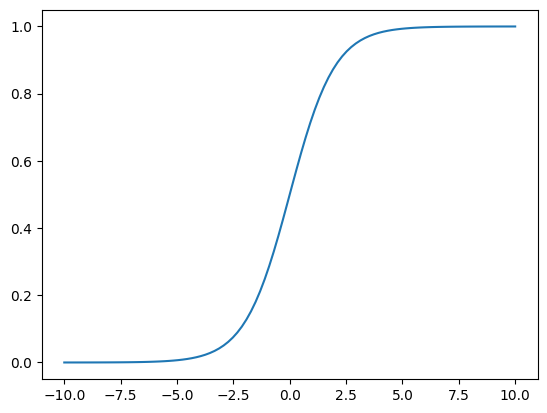

5. X_train_grad value
0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]
6. Y_train_grad value
0.2183301938265977
[0.04290299 2.56623412 2.64679737]
7. Print res.x
0.20349770158945205
[-25.16134246   0.20623179   0.20147167]
8. Decision boundary - graph for exam score


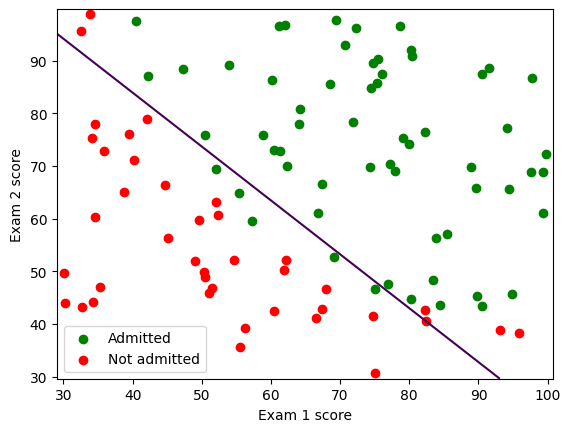

9. Proability value 
0.7762907420026233
10. Prediction value of mean


0.89

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
data = np.loadtxt("ex2data1.txt",delimiter=",")
X = data[:, [0,1]]
Y = data[:,2]
print("1. Array Value of x")
print(X[:5])

print("2. Array Value of y")
print(Y[:5])

print("3. Exam 1 - score graph")
plt.figure()
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label="Admitted",color="green")
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], label="Not admitted",color="red")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.plot()
X_plot = np.linspace(-10, 10, 100)
plt.plot(X_plot, sigmoid(X_plot))
print("4. Sigmoid function graph")
plt.show()

def costFunction(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = -(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    grad = np.dot(X.T, h - y) / X.shape[0]
    return J, grad

X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
J, grad = costFunction(theta, X_train, Y)
print("5. X_train_grad value")
print(J)  
print(grad)  

X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([-24, 0.2, 0.2])
J, grad = costFunction(theta, X_train, Y)
print("6. Y_train_grad value")
print(J) 
print(grad)  
     
def cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = - (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    return J

def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad

X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, Y),
                        method='Newton-CG', jac=gradient)
print("7. Print res.x")
print(res.fun) 
print(res.x)

def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted",color="green")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted",color="red")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

print("8. Decision boundary - graph for exam score")
plotDecisionBoundary(res.x, X, Y)

prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print("9. Proability value ")
print(prob) 

def predict(theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    prob = sigmoid(np.dot(X_train, theta))
    return (prob >= 0.5).astype(int)

print("10. Prediction value of mean")
np.mean(predict(res.x, X) == Y)